In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.api as sm

In [2]:
iris = pd.read_csv("iris_dataset.csv")
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.138728,3.470118,1.441015,1.094873,setosa
1,2,4.849873,3.034931,1.414931,0.968687,setosa
2,3,4.715843,3.239083,1.295309,1.006643,setosa
3,4,4.603747,NaN,1.480616,1.002344,setosa
4,5,4.988744,3.645049,1.417527,1.122947,setosa


In [3]:
# Delete individuals with at least one missing value
iris_dna = iris.dropna(axis=0, how='any')
print("iris: {} individuals, iris_dna: {} individuals".format(len(iris),len(iris_dna)))

#Drop "ID" field
iris_dna = iris_dna.drop("id", axis=1)

iris: 150 individuals, iris_dna: 146 individuals


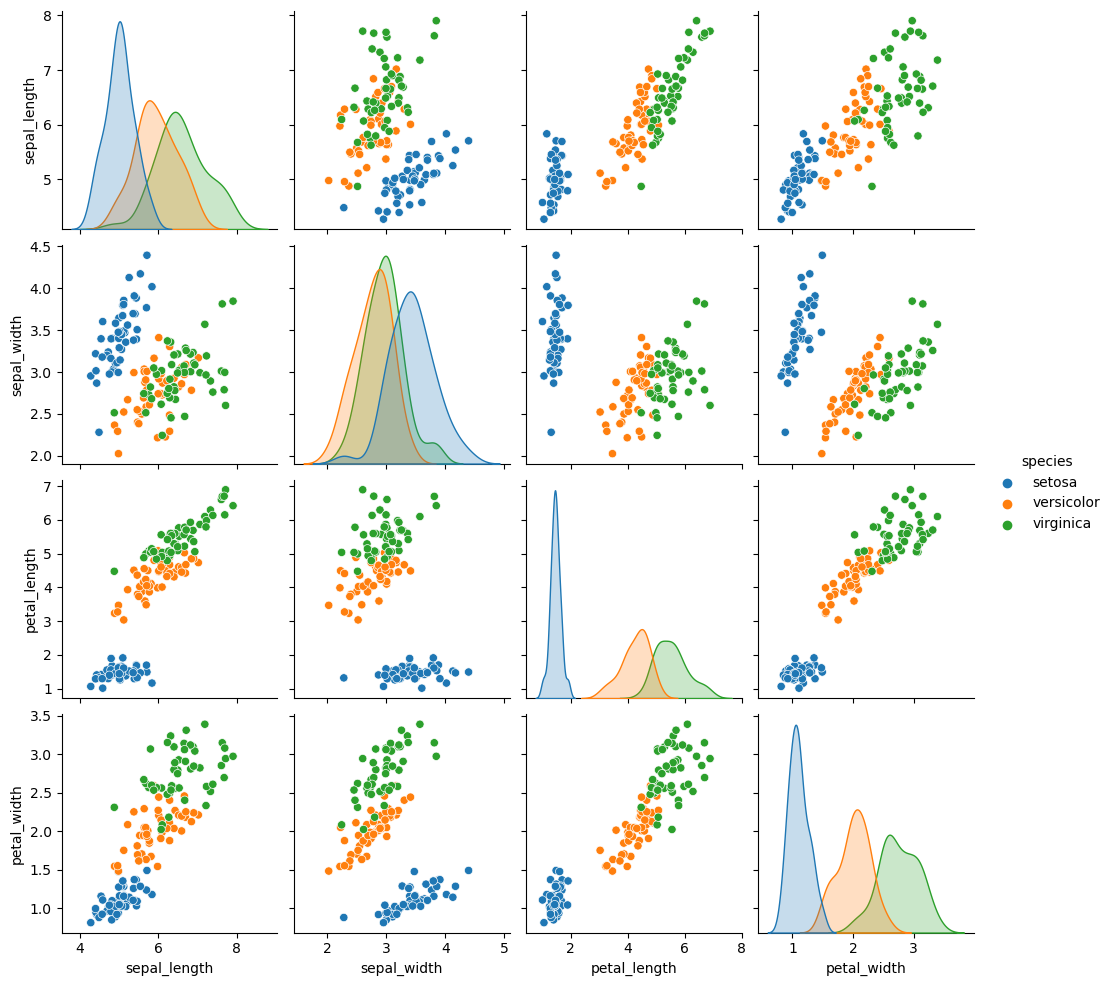

In [4]:
# Show dispersion diagrams
sns.pairplot(iris_dna,hue="species")

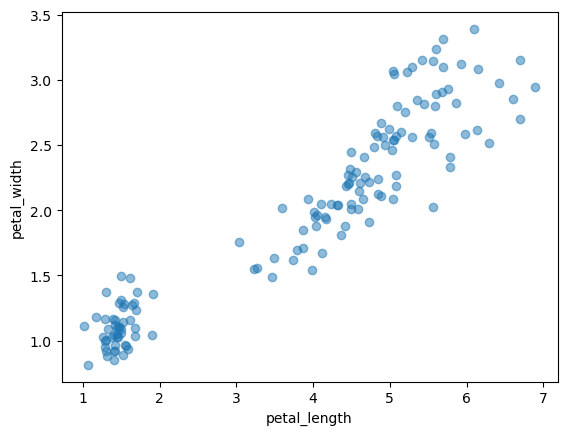

In [5]:
plt.scatter(iris_dna["petal_length"],iris_dna["petal_width"],alpha=0.5)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

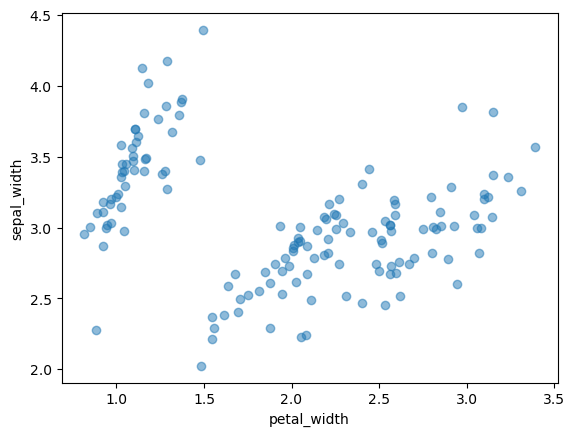

In [6]:
plt.scatter(iris_dna["petal_width"],iris_dna["sepal_width"], alpha=0.5)
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

In [22]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

Question 1:

In the iris_dna dataframe, calculate the following linear correlation coefficients:

    petal_width as a function of petal_length

    sepal_width as a function of petal_width

In [7]:
st.pearsonr(iris_dna["petal_width"],iris_dna["petal_length"])[0]

0.9418817573025173

In [8]:
st.pearsonr(iris_dna["sepal_width"],iris_dna["petal_width"])[0]

-0.24797130615784602

Question 3:

You will calculate four linear regressions (using the Method of Ordinary Least Squares). We will use the following notation: Y = aX + b + epsilon .

a and b are the real numbers you need to estimate, epsilon is the term of error (you don’t need to worry about this), X and Y are two variables.

The four linear regressions correspond to each of these four cases:

Case 1:  X is the variable petal_length, and Y is the variable petal_width, in the iris_dna dataframe
Case 2:  X is the variable petal_width, and Y is the variable sepal_width, in the iris_setosa dataframe
Case 3:  X is the variable petal_width, and Y is the variable sepal_width, in the iris_virginica dataframe
Case 4:  X is the variable petal_width, and Y is the variable sepal_width, in the iris_versicolor dataframe

In [10]:
X = iris_dna[["petal_length"]]
Y = iris_dna["petal_width"]

X["intercept"] = 1.

result = sm.OLS(Y,X).fit()

C:\Users\dipesh.gandhi\AppData\Local\Temp\ipykernel_31720\3300845851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"] = 1.


In [12]:
a, b = result.params["petal_length"], result.params["intercept"]

In [18]:
print("a = {}, b = {}".format(a,b))

a = 0.38599421003086465, b = 0.5092683365300004


In [23]:
X = iris_setosa[["petal_width"]]
Y = iris_setosa["sepal_width"]

X["intercept"] = 1.

result = sm.OLS(Y,X).fit()

C:\Users\dipesh.gandhi\AppData\Local\Temp\ipykernel_31720\3444120500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"] = 1.


In [24]:
a, b = result.params["petal_width"], result.params["intercept"]

print("a = {}, b = {}".format(a,b))

a = 1.7875014940283411, b = 1.459327491735277


In [25]:
X = iris_virginica[["petal_width"]]
Y = iris_virginica["sepal_width"]

X["intercept"] = 1.

result = sm.OLS(Y,X).fit()

C:\Users\dipesh.gandhi\AppData\Local\Temp\ipykernel_31720\3050811666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"] = 1.


In [26]:
a, b = result.params["petal_width"], result.params["intercept"]

print("a = {}, b = {}".format(a,b))

a = 0.6992505959712976, b = 1.0377429413261892


In [27]:
X = iris_versicolor[["petal_width"]]
Y = iris_versicolor["sepal_width"]

X["intercept"] = 1.

result = sm.OLS(Y,X).fit()

C:\Users\dipesh.gandhi\AppData\Local\Temp\ipykernel_31720\3051402362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"] = 1.


In [28]:
a, b = result.params["petal_width"], result.params["intercept"]

print("a = {}, b = {}".format(a,b))

a = 0.9735704312621848, b = 0.8094893720788434


Question 4: Fill out missing out using linear regression

In [30]:
coeffs = {
    "case 1" : {'a':0.386, 'b':0.509 },
    "case 2" : {'a':1.788, 'b':1.459 },
    "case 3" : {'a':0.699, 'b':1.038 },
    "case 4" : {'a':0.974, 'b':0.809 }
}

modified_lines = []

In [32]:
for (i, individual) in iris.iterrows():
    if pd.isnull(individual["petal_width"]):
        a = coeffs["case 1"]['a']
        b = coeffs["case 1"]['b']
        X = individual["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # we replace the missing value by Y
        modified_lines.append(i)
        print("We filled petal_width with {} based on petal_length={}".format(Y,X))
    
    if pd.isnull(individual["sepal_width"]):
        species = individual["species"]
        X = individual["petal_width"]
        if species == "setosa":
            a = coeffs["case 2"]['a']
            b = coeffs["case 2"]['b']
        elif species == "virginica":
            a = coeffs["case 3"]["a"]
            b = coeffs["case 3"]["b"]
        elif species == "versicolor":
            a = coeffs["case 4"]["a"]
            b = coeffs["case 4"]["b"]
        Y = a*X + b
        iris.loc[i,"sepal_width"] = Y
        modified_lines.append(i)
        print("We filled sepal_width with {} based on the species:{} and petal_width={}".format(Y,species,X))

We filled sepal_width with 3.2511902989271277 based on the species:setosa and petal_width=1.0023435676326218
We filled petal_width with 2.0637454592019826 based on petal_length=4.027837977207209
We filled sepal_width with 3.0101955089283963 based on the species:versicolor and petal_width=2.259954321281721
We filled sepal_width with 3.3599888073140196 based on the species:virginica and petal_width=3.3218723995908728


In [34]:
print(iris.loc[modified_lines])

      id  sepal_length  sepal_width  petal_length  petal_width     species
3      4      4.603747     3.251190      1.480616     1.002344      setosa
53    54      5.442775     2.340928      4.027838     2.063745  versicolor
61    62      5.879497     3.010196      4.181942     2.259954  versicolor
100  101      6.230628     3.359989      6.001908     3.321872   virginica
